In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import citipy
import json
import csv
#seems a strange thing to import...
import time


# Import API key
from api_keys import api_key

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes aand longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city) 

# Print the city count to confirm sufficient count

len(cities)

584

In [3]:

#name the URL and setting to farenheit
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#build the query
query_url = f"{url}appid={api_key}&units={units}&q="

#define the frame and set the first city row to zero
data=[]
c_row=0

for city in cities[:600]:
    
    #requesting the city info
   json = requests.get(query_url + city).json()

   #add to each row 
   c_row=c_row+1

   try:
       #gather data
       cityid=json['sys']['id'] 
       cityname=json['name'] 
       cloudiness=json['clouds']['all']
       country=json['sys']['country']
       date=json['dt']
       humidity=json['main']['humidity']
       lat=json['coord']['lat']
       lon=json['coord']['lon']
       tempmax=json['main']['temp_max']
       speed=json['wind']['speed']

       #put together the data
       data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
        
       #print the processing
       print(f"Processing Record {c_row} || City ID: {json['sys']['id']}  || Name: {json['name']}") 
        
       #put in a timer
       time.sleep(.1)
      
   except:
       print("City not found. Skipping...")

Processing Record 1 || City ID: 7881  || Name: Hilo
City not found. Skipping...
Processing Record 3 || City ID: 3996  || Name: Basco
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 10 || City ID: 2377  || Name: Los Llanos de Aridane
City not found. Skipping...
Processing Record 12 || City ID: 1007  || Name: Yellowknife
City not found. Skipping...
Processing Record 14 || City ID: 1899  || Name: Cape Town
City not found. Skipping...
Processing Record 16 || City ID: 9229  || Name: Vaini
City not found. Skipping...
City not found. Skipping...
Processing Record 19 || City ID: 3273  || Name: Albany
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 24 || City ID: 8310  || Name: Neuquen
City not found. Skipping...
Processing Record 26 || City ID: 935  || Name: Thompson
City not f

Processing Record 208 || City ID: 7031  || Name: Orasac
Processing Record 209 || City ID: 8810  || Name: Esperance
Processing Record 210 || City ID: 9576  || Name: Nhulunbuy
Processing Record 211 || City ID: 7286  || Name: Pangai
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 216 || City ID: 9545  || Name: New Norfolk
City not found. Skipping...
City not found. Skipping...
Processing Record 219 || City ID: 9124  || Name: Hambantota
City not found. Skipping...
City not found. Skipping...
Processing Record 222 || City ID: 6450  || Name: Saint-Augustin
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 229 || City ID: 4029  || Name: Havelock
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 233 || City ID: 900  || Name: Bea

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 419 || City ID: 2061  || Name: Bambous Virieux
City not found. Skipping...
Processing Record 421 || City ID: 1328  || Name: Orissaare
City not found. Skipping...
City not found. Skipping...
Processing Record 424 || City ID: 3348  || Name: Grand Island
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 428 || City ID: 1702  || Name: Zamosc
Processing Record 429 || City ID: 4430  || Name: Mastic Beach
City not found. Skipping...
City not found. Skipping...
Processing Record 432 || City ID: 8415  || Name: Mazagao
City not found. Skipping...
Processing Record 434 || City ID: 8824  || Name: Lenger
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 438 || City ID: 6438  || Name: Udala
Processing Record 439 || City ID: 6099  || Name: Gro

In [12]:
# Pop the data into a frame and reset index
weather_df = pd.DataFrame(data).reset_index()

# rename the columns
weather_df = weather_df.rename(index = str, columns = {0:"City", 1:"Cloudiness", 2:"Country", 
                3:"Date", 4:"Humidity", 5:"Lat", 6:"Lng", 7:"Max Temp", 8:"Wind Speed"})                                         

weather_df.head(10)

,index,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,hilo,75,US,1546217580,73,19.71,-155.08,77.00,11.41
1,1,basco,1,US,1546220100,74,40.33,-91.20,35.06,8.05
2,2,los llanos de aridane,24,ES,1546219800,59,28.66,-17.92,62.60,8.05
3,3,yellowknife,20,CA,1546218000,73,62.45,-114.38,-29.21,3.36
4,4,cape town,0,ZA,1546218000,64,-33.93,18.42,68.00,10.29
5,5,vaini,0,IN,1546218000,62,15.34,74.49,59.00,7.63
6,6,albany,90,US,1546218960,72,42.65,-73.75,32.00,8.05
7,7,neuquen,0,AR,1546218000,27,-38.95,-68.06,75.20,5.82
8,8,thompson,5,CA,1546218000,67,55.74,-97.86,-27.41,4.70
9,9,georgetown,75,GY,1546218000,78,6.80,-58.16,78.80,9.17


Text(0.5,0,'Latitude')

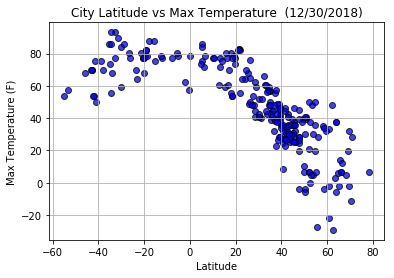

In [13]:
#create the scatter plot for Max Temp
maxtemp_scatter = plt.scatter(weather_df['Lat'], weather_df['Max Temp'], alpha=0.75, facecolor="blue", edgecolors="black")
#set the current date
today = (time.strftime("%m/%d/%Y"))
#put in gridlines
plt.grid()
#define the title, x, and y labels
plt.title('City Latitude vs Max Temperature  (' + str(today) + ')')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

Text(0.5,0,'Latitude')

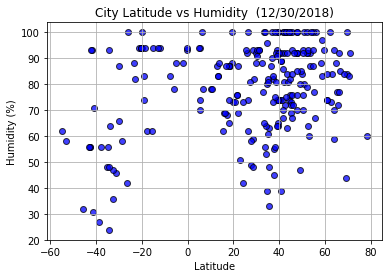

In [14]:
#create the scatter plot for humidity
maxtemp_scatter = plt.scatter(weather_df['Lat'], weather_df['Humidity'], alpha=0.75, facecolor="blue", edgecolors="black")
#set the current date
today = (time.strftime("%m/%d/%Y"))
#put in gridlines
plt.grid()
#define the title, x, and y labels
plt.title('City Latitude vs Humidity  (' + str(today) + ')')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

Text(0.5,0,'Latitude')

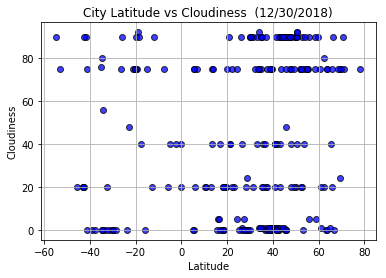

In [15]:
#create the scatter plot for cloudiness
maxtemp_scatter = plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], alpha=0.75, facecolor="blue", edgecolors="black")
#set the current date
today = (time.strftime("%m/%d/%Y"))
#put in gridlines
plt.grid()
#define the title, x, and y labels
plt.title('City Latitude vs Cloudiness  (' + str(today) + ')')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

Text(0.5,0,'Latitude')

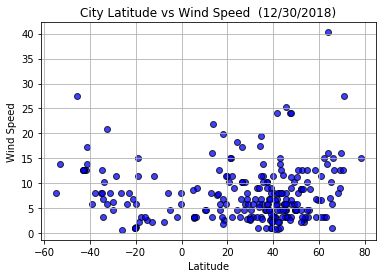

In [16]:
#create the scatter plot for wind speed
maxtemp_scatter = plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], alpha=0.75, facecolor="blue", edgecolors="black")
#set the current date
today = (time.strftime("%m/%d/%Y"))
#put in gridlines
plt.grid()
#define the title, x, and y labels
plt.title('City Latitude vs Wind Speed  (' + str(today) + ')')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

In [17]:
#export to CSV
weather_df.to_csv("cities.csv")